In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import io
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
from google.colab import files
up = files.upload()

Saving bank-full2.csv to bank-full2.csv


In [3]:
data = pd.read_csv(io.StringIO(up['bank-full2.csv'].decode('utf-8')))
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [46]:
X = data.iloc[:,0:16]
Y = data.iloc[:,16]
Y = Y.map(dict(yes=1, no=0))

In [47]:
X=pd.get_dummies(X)
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [48]:
data_new = X.join(Y)
data_new

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,1,0,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin.           45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

In [50]:
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [51]:
y_pred = classifier.predict(X)

In [52]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [53]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [54]:
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39145   777]
 [ 4114  1175]]


In [55]:
classifier.score(X,Y)

0.8918183627878171

In [56]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

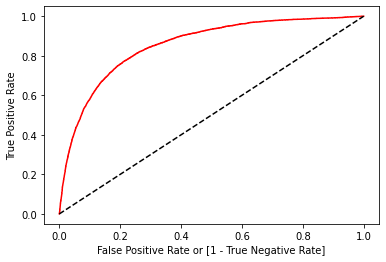

In [57]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [58]:
auc

0.6013481227891457